In [1]:
from module import dqn

import random

import gym
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
env = gym.make('LunarLander-v2', continuous=False, render_mode='human')
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print("State size = ", state_size, "; action size = ", action_size)

State size =  8 ; action size =  4


TRAINING

In [3]:
env = gym.make('LunarLander-v2')
# create an agent
agent = dqn.DQNAgent(state_size, action_size, lr=0.001)
# to store the scores and episodes
num_episodes = 10000
scores, avg_scores = [], []
# start training
for e in range(num_episodes):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state[0], [1, state_size])
    time_step = 0  # to count number of steps the ship takes to land
    while not done:
        time_step += 1
        # get action for the current state and go one step in environment
        action = agent.act(state)
        next_state, reward, done, _, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # store the data
        agent.store_data(state=state, action=action, reward=reward, next_state=next_state, done=done)
        # train every time step
        agent.learn()
        score += reward
        state = next_state
        if time_step > 2000:
            # we exit the game early if the episode takes too long
            print("Exit the game since this episode takes too long.")
            break
        if done:
            scores.append(score)
            avg_scores.append(np.mean(scores[-100:]))
            if e % 10 == 0:
                print("Episode:", e, " -- Score:", score, " -- Avg score:", round(avg_scores[-1], 2))
    
    # stop training if the avg score is above 250
    if avg_scores[-1] >= 250:
        print('Training is done ! The average score is above 250.')
        break
    

Episode: 0  -- Score: -88.60831897623112  -- Avg score: -88.61


/Users/sondinhvan/miniconda3/envs/rl_env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 10  -- Score: -440.67096066420015  -- Avg score: -261.81
Collect enough samples. Start training.
Episode: 20  -- Score: -31.21736685709476  -- Avg score: -287.93
Episode: 30  -- Score: -15.311660344797772  -- Avg score: -221.03
Episode: 40  -- Score: 9.867655088489954  -- Avg score: -182.45
Episode: 50  -- Score: -47.35461417649094  -- Avg score: -154.32
Episode: 60  -- Score: 175.7837194781779  -- Avg score: -128.3
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode takes too long.
Exit the game since this episode

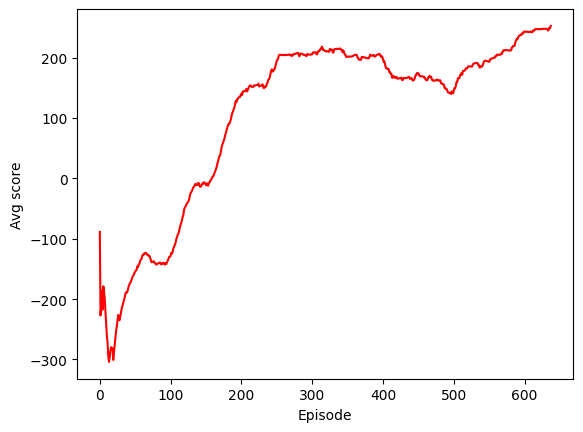

In [7]:
plt.plot(avg_scores, color='red')
plt.xlabel('Episode')
plt.ylabel('Avg score')
plt.savefig('dqn_lunalander_loss_over_episodes')

TESTING

In [11]:
env = gym.make('LunarLander-v2', render_mode='human')
# start testing
done = False
score = 0
state = env.reset()
state = np.reshape(state[0], [1, state_size])

while not done:
    # get action for the current state and go one step in environment
    action = agent.act(state, evaluate=True)
    next_state, reward, done, _, info = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    score += reward
    state = next_state

print(score)

252.15155115670007
